In [1]:
from time import time
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
start = time()

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
tags = pd.read_csv("tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
ratings_with_title = pd.merge(ratings, movies,on = "movieId")

In [8]:
ratings_with_title

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [9]:
ratings_training_90, ratings_test_10 = train_test_split(ratings_with_title, test_size=0.10)

In [10]:
ratings_training_90

,userId,movieId,rating,timestamp,title,genres
62881,312,2968,4.0,1043176640,Time Bandits (1981),Adventure|Comedy|Fantasy|Sci-Fi
35196,603,3994,1.0,980732199,Unbreakable (2000),Drama|Sci-Fi
82694,66,4231,3.5,1113190589,Someone Like You (2001),Comedy|Romance
9713,64,1580,3.5,1161520051,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi
93745,531,2473,3.0,1032961599,Soul Man (1986),Comedy
...,...,...,...,...,...,...
85631,80,78266,4.0,1377391200,Splice (2009),Horror|Sci-Fi|Thriller
50902,610,3039,4.5,1493850239,Trading Places (1983),Comedy
28711,99,145,4.0,829828005,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller
77592,274,2042,3.5,1172024333,D2: The Mighty Ducks (1994),Children|Comedy


In [11]:
ratings_training_90.groupby(by=["title"])["rating"].count().reset_index().sort_values(by = "rating", ascending=False).head(500)

,title,rating
3043,Forrest Gump (1994),303
6626,Pulp Fiction (1994),282
7326,"Shawshank Redemption, The (1994)",276
7409,"Silence of the Lambs, The (1991)",255
5312,"Matrix, The (1999)",239
...,...,...
124,50 First Dates (2004),42
6364,Phenomenon (1996),42
455,Analyze This (1999),42
322,Alien³ (a.k.a. Alien 3) (1992),42


In [12]:
pivot_table_data = ratings_training_90.pivot(index= "userId", columns="movieId", values="rating").fillna(0)

In [13]:
pivot_table_data

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193567,193573,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
def knn_ratings_users(p_data, user_id, movie_id, k):

    movie_rated      = p_data[p_data[movie_id] != 0]
    ratings_ex_movie = movie_rated.loc[:, movie_rated.columns != movie_id]
    x_prime = p_data.loc[user_id, p_data.columns != movie_id].values

    distances = {i: np.sqrt(np.sum((ratings_ex_movie.loc[i].values - x_prime)**2)) for i in ratings_ex_movie.index}
    
    sorted_distances = sorted(distances.items(), key=lambda x: x[1])
    if(len(sorted_distances)>=k):
        kth_distance = sorted_distances[k-1][1]
    
        sorted_distances = [(user, distance) for user, distance in sorted_distances if distance <= kth_distance]
    return sorted_distances
    

In [39]:
def knn_unweighted_rating(p_data, user_id, movie_id, k):

    nearest_neigbors = knn_ratings_users(p_data, user_id, movie_id, k)
    users = [user[0] for user in knn_ratings_users(p_data, user_id, movie_id, k)]
    distances = [user[1] for user in knn_ratings_users(p_data, user_id, movie_id, k)]
    user_ratings     = p_data.loc[users, movie_id]

    return user_ratings.mean()

In [40]:
ratings_test_10_pred = {}
for k_val in [3,5,10]:

    ratings_test_pred = []
    for idx in ratings_test_10.index:
    
    
        u_id, m_id = ratings_test_10.loc[idx,"userId"], ratings_test_10.loc[idx,"movieId"]
        if m_id not in pivot_table_data.columns:
        
            ratings_test_pred.append("Movie Was Not Rated in Training")
        else:
            
            ratings_test_pred.append(knn_unweighted_rating(pivot_table_data, u_id, m_id, k_val))
    ratings_test_10_pred[k_val] = ratings_test_pred

In [48]:
def knn_weighted_rating(p_data, user_id, movie_id, k):

    nearest_neigbors = knn_ratings_users(p_data, user_id, movie_id, k)
    users = [user[0] for user in knn_ratings_users(p_data, user_id, movie_id, k)]
    distances = [user[1] for user in knn_ratings_users(p_data, user_id, movie_id, k)]
    # print(distances)
    if(len(distances)>1):
        weights   = [(distances[-1]-distances[m])/(distances[-1]-distances[0]) for m in range(len(distances))]
        
    elif(sum(distances)==0 ):
        weights   = [1]*len(distances)
    else:
        weights   = [1]
    user_ratings     = p_data.loc[users, movie_id]
    return sum(user_ratings*weights)/sum(weights)

In [49]:
ratings_test_10_pred_we = {}
for k_val in [3,5,10]:

    ratings_test_pred_we = []
    for idx in ratings_test_10.index:
    
    
        u_id, m_id = ratings_test_10.loc[idx,"userId"], ratings_test_10.loc[idx,"movieId"]
        if m_id not in pivot_table_data.columns:
        
            ratings_test_pred_we.append("Movie Was Not Rated in Training")
        else:
            
            ratings_test_pred_we.append(knn_weighted_rating(pivot_table_data, u_id, m_id, k_val))
    ratings_test_10_pred_we[k_val] = ratings_test_pred_we

KeyboardInterrupt: 

In [ ]:
ratings_test_10 = ratings_test_10[["userId","movieId","rating"]]
ratings_test_10.columns = ["userId","movieId","realRating"]

In [ ]:
for k in [3,5,10]:
    
    ratings_test_10_cp = ratings_test_10.copy()
    ratings_test_10_cp["predicetedRating"] = ratings_test_10_pred[k]
    ratings_test_10_cp.to_excel("ratings_predictions_10_knn_uw_k"+str(k)+".xlsx", index = False)
    ratings_test_10_cp1 = ratings_test_10.copy()
    ratings_test_10_cp1["predicetedRating"] = ratings_test_10_pred_we[k]
    ratings_test_10_cp1.to_excel("ratings_predictions_10_knn_wt_k"+str(k)+".xlsx", index = False)

In [ ]:
Accuracy_un = {}
for k in [3,5,10]:
    
    ratings_test_10_cp = ratings_test_10.copy()
    ratings_test_10_cp["predicetedRating"] = ratings_test_10_pred[k]
    ratings_test_10_cp = ratings_test_10_cp[ratings_test_10_cp["predicetedRating"]!="Movie Was Not Rated in Training"]
    Accuracy_un[k] = 1-mean_absolute_percentage_error(ratings_test_10_cp['rating'],ratings_test_10_cp["predicetedRating"])

In [14]:
k_values = list(Accuracy_un.keys())
error_values = list(Accuracy_un.values())

# Plotting
plt.plot(k_values, error_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Error')
plt.show()

NameError: name 'Accuracy_un' is not defined

In [ ]:
Accuracy_we = {}
for k in [3,5,10]:
    
    ratings_test_10_cp = ratings_test_10.copy()
    ratings_test_10_cp["predicetedRating"] = ratings_test_10_pred_we[k]
    ratings_test_10_cp = ratings_test_10_cp[ratings_test_10_cp["predicetedRating"]!="Movie Was Not Rated in Training"]
    Accuracy_we[k] = mean_absolute_percentage_error(ratings_test_10_cp['rating'],ratings_test_10_cp["predicetedRating"])

In [ ]:
k_values = list(Accuracy_we.keys())
error_values = list(Accuracy_un.values())

# Plotting
plt.plot(k_values, error_values, marker='o', linestyle='-', color='b')
plt.title('Error vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Error')
plt.show()

In [50]:
ratings_train_60, ratings_test_40 = train_test_split(ratings, test_size=0.4, random_state=504)
ratings_train_70, ratings_test_30 = train_test_split(ratings, test_size=0.3, random_state=504)
ratings_train_80, ratings_test_20 = train_test_split(ratings, test_size=0.2, random_state=504)
ratings_train_90, ratings_test_10 = train_test_split(ratings, test_size=0.1,  random_state=504)

In [78]:
def sarwar_karypis(train_data, test_data):

    user_avg_ratings = train_data.groupby('userId')[['rating']].mean().reset_index()
    def similarity_score(movie1, movie2):

       
        common_users = set(train_data.query('movieId==@movie1')["userId"]).intersection(set(train_data.query('movieId==@movie2')["userId"]))
        
        if len(common_users)==0:
            return 0
    
        common_user_avg_ratings = user_avg_ratings.query("userId in @common_users")["rating"].values
        m1_ratings = train_data.query("userId in @common_users").query('movieId==@movie1').sort_values("userId")["rating"].values
        m2_ratings = train_data.query("userId in @common_users").query('movieId==@movie2').sort_values("userId")["rating"].values

        num        = np.sum((m1_ratings-common_user_avg_ratings)*(m2_ratings-common_user_avg_ratings))
    
        dem        = np.sqrt(np.sum((m1_ratings-common_user_avg_ratings)**2))*np.sqrt(np.sum((m2_ratings-common_user_avg_ratings)**2))
    
        sim_score  = num/dem
        # print(sim_score)
        return sim_score
    def get_similarity_matrix(movie1, movie2, similarity_matrix):
        score = similarity_matrix.loc[movie1, movie2]
        if score == -2:
            # similarity_matrix.loc[movie1, movie2] = similarity_score(movie1, movie2)
            # similarity_matrix.loc[movie2, movie1] = similarity_matrix.loc[movie1, movie2]
            score =similarity_score(movie1, movie2)
        
        return score
        
    def prediction(user, movie, similarity_matrix):

        spec_user    = train_data.query('userId==@user')
        
        user_movies  = spec_user["movieId"].values

        for u in user_movies:
            sim_score         = get_similarity_matrix(movie, u, similarity_matrix)
            similarity_matrix.loc[movie, u] = sim_score
            similarity_matrix.loc[u, movie] = sim_score
            # print(sim_score)

    
        N_indices = np.where(similarity_matrix.loc[movie]>0)[0]
        N         = similarity_matrix.loc[movie].index[N_indices]
        # print(N)
        try:
            num = 0
            dem = 0
            for j in N:
                if j in user_movies:
                    
                    num = num+(similarity_matrix.loc[movie,j]*train_data.query('userId==@user').query('movieId==@j')["rating"].values[0])
                # print(train_data.query('userId==@user').query('movieId==@j')["rating"].values[0])
                    dem = dem+similarity_matrix.loc[movie,j]
    
            
            return num/dem
        except:
            return "Movie Was Not Rated in Training"

    
    num_movies = train_data['movieId'].nunique()
    movies = train_data['movieId'].unique()

    similarity_matrix = pd.DataFrame(np.full((num_movies, num_movies), -2.0), columns=movies, index=movies)
    predictions       = test_data.copy()
    predictions_test  = []
    for r in range(test_data.shape[0]):
        print(r)
    
        us = test_data.iloc[r]["userId"]
        mv = test_data.iloc[r]["movieId"]
        
        if mv in train_data["movieId"].unique():
            
            predictions_test.append(prediction(us, mv, similarity_matrix))
            
            # matrics.append(similarity_matrix)
        else:
            predictions_test.append("Movie Was Not Rated in Training")
 
    return predictions_test

In [108]:
Accuracy_CF = {}

In [79]:
a = sarwar_karypis(ratings_train_90, ratings_test_10.iloc[:1000])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219


C:\Users\manik\AppData\Local\Temp\ipykernel_5752\958712326.py:20: RuntimeWarning: invalid value encountered in scalar divide
  sim_score  = num/dem


220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469


In [81]:
ratings_test_10_first_1000 = ratings_test_10.iloc[:1000]
ratings_test_10_first_1000["predicetedRating"] = a

C:\Users\manik\AppData\Local\Temp\ipykernel_5752\3331895858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_test_10_first_1000["predicetedRating"] = a


In [109]:
ratings_test_10_first_1000 = ratings_test_10_first_1000[ratings_test_10_first_1000["predicetedRating"]!="Movie Was Not Rated in Training"]
Accuracy_CF["TestSize10"] = 1-mean_absolute_percentage_error(ratings_test_10_first_1000['rating'],ratings_test_10_first_1000["predicetedRating"])

In [90]:
ratings_test_10_first_1000.to_excel("ratings_predictions_10_cf"+".xlsx", index = False)

In [91]:
c = sarwar_karypis(ratings_train_70, ratings_test_30.iloc[:1000])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237


C:\Users\manik\AppData\Local\Temp\ipykernel_5752\958712326.py:20: RuntimeWarning: invalid value encountered in scalar divide
  sim_score  = num/dem


238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487


In [93]:
ratings_test_30_first_1000 = ratings_test_30.iloc[:1000]
ratings_test_30_first_1000["predicetedRating"] = c

C:\Users\manik\AppData\Local\Temp\ipykernel_5752\2838003294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_test_30_first_1000["predicetedRating"] = c


In [110]:
ratings_test_30_first_1000 = ratings_test_30_first_1000[ratings_test_30_first_1000["predicetedRating"]!="Movie Was Not Rated in Training"]
Accuracy_CF["TestSize30"] = 1-mean_absolute_percentage_error(ratings_test_30_first_1000['rating'],ratings_test_30_first_1000["predicetedRating"])

In [95]:
ratings_test_30_first_1000.to_excel("ratings_predictions_30_cf"+".xlsx", index = False)

In [96]:
b = sarwar_karypis(ratings_train_80, ratings_test_20.iloc[:1000])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237


C:\Users\manik\AppData\Local\Temp\ipykernel_5752\958712326.py:20: RuntimeWarning: invalid value encountered in scalar divide
  sim_score  = num/dem


238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487


In [99]:
ratings_test_20_first_1000 = ratings_test_20.iloc[:1000]
ratings_test_20_first_1000["predicetedRating"] = b

C:\Users\manik\AppData\Local\Temp\ipykernel_5752\3658699959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_test_20_first_1000["predicetedRating"] = b


In [111]:
ratings_test_20_first_1000 = ratings_test_20_first_1000[ratings_test_20_first_1000["predicetedRating"]!="Movie Was Not Rated in Training"]
Accuracy_CF["TestSize20"] = 1-mean_absolute_percentage_error(ratings_test_20_first_1000['rating'],ratings_test_20_first_1000["predicetedRating"])

In [101]:
ratings_test_20_first_1000.to_excel("ratings_predictions_20_cf"+".xlsx", index = False)

In [102]:
d = sarwar_karypis(ratings_train_60, ratings_test_40.iloc[:1000])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


C:\Users\manik\AppData\Local\Temp\ipykernel_5752\958712326.py:20: RuntimeWarning: invalid value encountered in scalar divide
  sim_score  = num/dem


123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372


In [103]:
ratings_test_40_first_1000 = ratings_test_40.iloc[:1000]
ratings_test_40_first_1000["predicetedRating"] = d

C:\Users\manik\AppData\Local\Temp\ipykernel_5752\2983735013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_test_40_first_1000["predicetedRating"] = d


In [112]:
ratings_test_40_first_1000 = ratings_test_40_first_1000[ratings_test_40_first_1000["predicetedRating"]!="Movie Was Not Rated in Training"]
Accuracy_CF["TestSize40"] = 1-mean_absolute_percentage_error(ratings_test_40_first_1000['rating'],ratings_test_40_first_1000["predicetedRating"])

In [107]:
ratings_test_40_first_1000.to_excel("ratings_predictions_40_cf"+".xlsx", index = False)

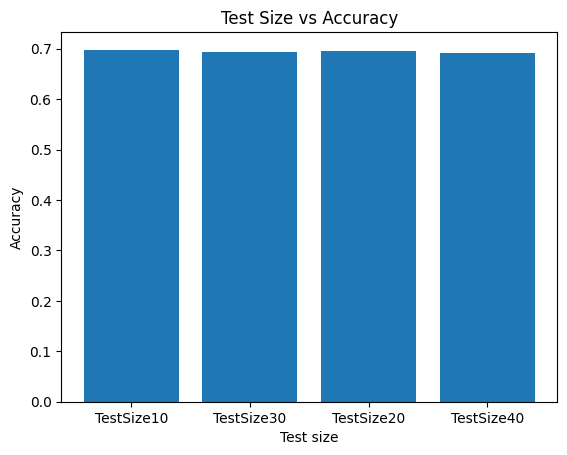

In [114]:
cf_values = list(Accuracy_CF.keys())
acc_vals = list(Accuracy_CF.values())
plt.bar(cf_values, acc_vals)
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Test Size vs Accuracy')
plt.show()